In [ ]:
Notes taken from:
    
Learning Path: Deep Dive into Python Machine Learning, presented by Eder Santana, Chapter 4
    
by Ankita Thakur - Curator

Published by Packt Publishing, 2016

Learn what is Deep Learning, Recurrent Neural Networks in Theano

Recurrent Neural Networks:

RNN - Layers: new state of the network is a result of the projection of the previous hidden state plus the projection of the current input plus a bias and then followed by a non-linearity, usually a hyperbolic tangent. Updates are done at each time step in a loop.

RNN - LSTM (Long Short Term Memory): has 2 internal states, an exposed state, and 4 gates (input, forward, output, and update). Last hidden cell stores long term memory.
    
RNN - GRU (Gated Recurrent Units): perform similar to LSTM.  



In [2]:
%matplotlib inline
import matplotlib.pyplot as plt

import numpy as np
from theano import tensor as T, function, scan

In [6]:
X = T.tensor3('X')
W, U, init_h = T.matrices('W_xh','W_hh', 'init_h')
b = T.vector('b')

#h_t = tanh(W*x_t + U*h_tm1 + b)
def step(Wx_t, h_tm1, U):
    h_t = T.tanh(Wx_t + T.dot(h_tm1, U))
    return h_t

# Optimization
Wx = T.dot(X, W) + b
Wx = Wx.dimshuffle(1, 0, 2)  # swaps x's. 3 dimensions. make sure we have time x samples x dim

# Call scan to do the loop
outputs, updates = scan(step,
                       sequences = Wx,
                       outputs_info=init_h,  # initial hidden state
                       non_sequences=U)      # hidden to hidden matrix

In [7]:
F = function([X, init_h, W, U, b], outputs)

In [8]:
time = 100 # sequence length
batch = 50 # how many sequences processed in parallel
dim = 20
hidden_dim = 30

# values for inputs
xx = np.random.randn(batch, time, dim)
hh = np.zeros((batch, hidden_dim))  # initialize RNN hidden states with zeros
ww = .1 * np.ones((dim, hidden_dim)) # initialized weights with 1s
uu = .1 * np.ones((hidden_dim, hidden_dim))
bb = np.random.normal(0, .1, hidden_dim)

y = F(xx, hh, ww, uu, bb)

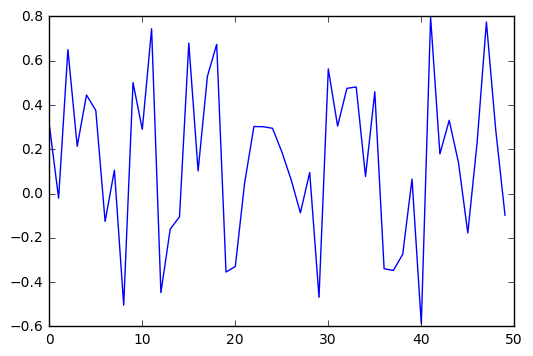

In [9]:
plt.plot(y[0, :, 0])